In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
label = "/Users/dutking/LOCAL/AI_uni/radlogix/dataset/effusions_052023/LUNG1-001/LUNG1001_effusion_first_reviewer.nii.gz"
feature = "/Users/dutking/LOCAL/AI_uni/radlogix/dataset/features/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046"

In [3]:
def plot_slice(image_array, slice=None):
    if slice:
        slice_array = image_array[slice, :, :]
    else:
        slice = int(image_array.shape[0] / 2)
        slice_array = image_array[slice, :, :]
    plt.title(f"slice {slice}")
    plt.imshow(
        slice_array,
        cmap=plt.cm.Greys_r,
        vmin=image_array.min(),
        vmax=image_array.max(),
    )
    plt.show()

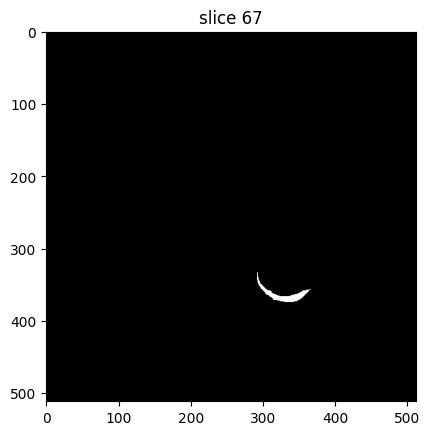

In [13]:
def get_image(file):
    image = sitk.ReadImage(file)
    image = sitk.DICOMOrient(image, "LPS")
    return image


def get_image_array(image):
    return sitk.GetArrayFromImage(image).astype(dtype=np.int16)


image = get_image(label)
image_array = get_image_array(image)
plot_slice(image_array, 67)

In [14]:
def get_pixels_by_slice(arr):
    dict = {}
    for idx, i in enumerate(arr):
        dict[f"slice_{idx+1}"] = np.sum(i)
    return dict

In [16]:
original_data = get_pixels_by_slice(image_array)

{'slice_1': 0, 'slice_2': 0, 'slice_3': 0, 'slice_4': 0, 'slice_5': 0, 'slice_6': 0, 'slice_7': 0, 'slice_8': 0, 'slice_9': 0, 'slice_10': 0, 'slice_11': 0, 'slice_12': 0, 'slice_13': 0, 'slice_14': 0, 'slice_15': 0, 'slice_16': 0, 'slice_17': 0, 'slice_18': 0, 'slice_19': 0, 'slice_20': 0, 'slice_21': 0, 'slice_22': 0, 'slice_23': 0, 'slice_24': 0, 'slice_25': 0, 'slice_26': 0, 'slice_27': 477, 'slice_28': 543, 'slice_29': 697, 'slice_30': 1005, 'slice_31': 1479, 'slice_32': 1444, 'slice_33': 1577, 'slice_34': 1446, 'slice_35': 1364, 'slice_36': 1374, 'slice_37': 1423, 'slice_38': 1317, 'slice_39': 1373, 'slice_40': 1280, 'slice_41': 1348, 'slice_42': 1254, 'slice_43': 1311, 'slice_44': 1431, 'slice_45': 1467, 'slice_46': 1513, 'slice_47': 1518, 'slice_48': 1416, 'slice_49': 1363, 'slice_50': 1380, 'slice_51': 1413, 'slice_52': 1349, 'slice_53': 1436, 'slice_54': 1485, 'slice_55': 1456, 'slice_56': 1513, 'slice_57': 1325, 'slice_58': 1365, 'slice_59': 1271, 'slice_60': 1145, 'slice_61

In [39]:
f = sitk.BinaryErodeImageFilter()
f.SetKernelType(sitk.sitkBall)
f.SetKernelRadius(1)
f.SetBackgroundValue(0)
f.SetForegroundValue(1)
new_img = f.Execute(image)

In [40]:
hole_filling_filter = sitk.VotingBinaryIterativeHoleFillingImageFilter()
hole_filling_filter.SetRadius(1)
hole_filling_filter.SetMajorityThreshold(3)
hole_filling_filter.SetBackgroundValue(0)
hole_filling_filter.SetForegroundValue(1)
hole_filled_image = hole_filling_filter.Execute(image)

In [8]:
f1 = sitk.BinaryThinningImageFilter()
f1_img = f1.Execute(image)

In [20]:
noise_f = sitk.NoiseImageFilter()
noise_img = noise_f.Execute(image)

In [21]:
denoised_image_array = get_image_array(noise_img)
denoised_image_data = get_pixels_by_slice(denoised_image_array)

In [18]:
eroded_image_array = get_image_array(new_img)
eroded_image_data = get_pixels_by_slice(eroded_image_array)

{'slice_1': 0, 'slice_2': 0, 'slice_3': 0, 'slice_4': 0, 'slice_5': 0, 'slice_6': 0, 'slice_7': 0, 'slice_8': 0, 'slice_9': 0, 'slice_10': 0, 'slice_11': 0, 'slice_12': 0, 'slice_13': 0, 'slice_14': 0, 'slice_15': 0, 'slice_16': 0, 'slice_17': 0, 'slice_18': 0, 'slice_19': 0, 'slice_20': 0, 'slice_21': 0, 'slice_22': 0, 'slice_23': 0, 'slice_24': 0, 'slice_25': 0, 'slice_26': 0, 'slice_27': 0, 'slice_28': 106, 'slice_29': 243, 'slice_30': 392, 'slice_31': 597, 'slice_32': 873, 'slice_33': 945, 'slice_34': 995, 'slice_35': 1036, 'slice_36': 1031, 'slice_37': 1024, 'slice_38': 983, 'slice_39': 990, 'slice_40': 985, 'slice_41': 920, 'slice_42': 975, 'slice_43': 971, 'slice_44': 962, 'slice_45': 1108, 'slice_46': 1101, 'slice_47': 1095, 'slice_48': 1059, 'slice_49': 1008, 'slice_50': 1011, 'slice_51': 1024, 'slice_52': 1006, 'slice_53': 972, 'slice_54': 1008, 'slice_55': 1018, 'slice_56': 951, 'slice_57': 918, 'slice_58': 842, 'slice_59': 813, 'slice_60': 760, 'slice_61': 687, 'slice_62': 

In [ ]:
thinned_image_array = get_image_array(f1_img)
thinned_image_data = get_pixels_by_slice(thinned_image_array)

In [41]:
hf_image_array = get_image_array(hole_filled_image)
hf_image_data = get_pixels_by_slice(hf_image_array)

In [42]:
print(original_data)
print(hf_image_data)
# print(eroded_image_data)
# print(denoised_image_data)
# print(thinned_image_data)

{'slice_1': 0, 'slice_2': 0, 'slice_3': 0, 'slice_4': 0, 'slice_5': 0, 'slice_6': 0, 'slice_7': 0, 'slice_8': 0, 'slice_9': 0, 'slice_10': 0, 'slice_11': 0, 'slice_12': 0, 'slice_13': 0, 'slice_14': 0, 'slice_15': 0, 'slice_16': 0, 'slice_17': 0, 'slice_18': 0, 'slice_19': 0, 'slice_20': 0, 'slice_21': 0, 'slice_22': 0, 'slice_23': 0, 'slice_24': 0, 'slice_25': 0, 'slice_26': 0, 'slice_27': 477, 'slice_28': 543, 'slice_29': 697, 'slice_30': 1005, 'slice_31': 1479, 'slice_32': 1444, 'slice_33': 1577, 'slice_34': 1446, 'slice_35': 1364, 'slice_36': 1374, 'slice_37': 1423, 'slice_38': 1317, 'slice_39': 1373, 'slice_40': 1280, 'slice_41': 1348, 'slice_42': 1254, 'slice_43': 1311, 'slice_44': 1431, 'slice_45': 1467, 'slice_46': 1513, 'slice_47': 1518, 'slice_48': 1416, 'slice_49': 1363, 'slice_50': 1380, 'slice_51': 1413, 'slice_52': 1349, 'slice_53': 1436, 'slice_54': 1485, 'slice_55': 1456, 'slice_56': 1513, 'slice_57': 1325, 'slice_58': 1365, 'slice_59': 1271, 'slice_60': 1145, 'slice_61

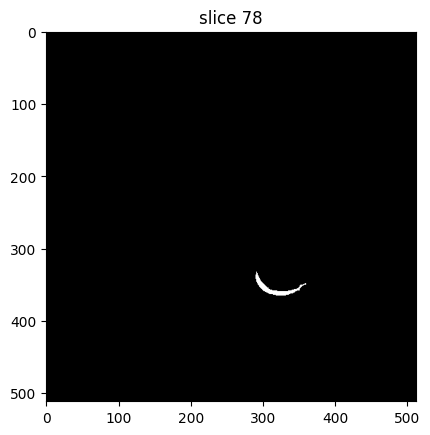

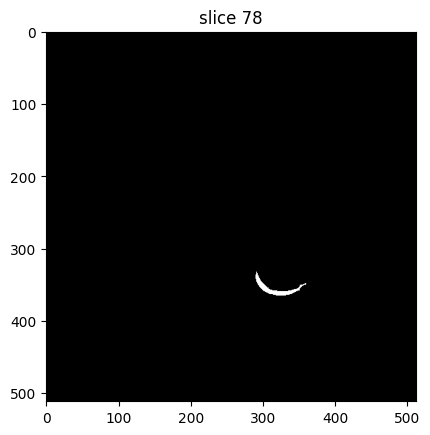

In [43]:
plot_slice(image_array, 78)
# plot_slice(eroded_image_array, 67)
# plot_slice(thinned_image_array, 67)
# plot_slice(denoised_image_array, 67)
plot_slice(hf_image_array, 78)